In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from predict_car_price import PredictCarPriceFromMileage # My model

In [2]:
data = pd.read_csv("../static/data.csv")
print(data.head())
data.describe()

       km  price
0  240000   3650
1  139800   3800
2  150500   4400
3  185530   4450
4  176000   5250


,km,price
count,24.000000,24.000000
mean,101066.250000,6331.833333
std,52674.245606,1319.654193
min,22899.000000,3650.000000
25%,65020.500000,5687.500000
50%,83014.500000,6495.000000
75%,140975.000000,7115.000000
max,240000.000000,8290.000000


In [ ]:
# Here should be preprocessing step. Just check for anomalies, like NaN values, etc.

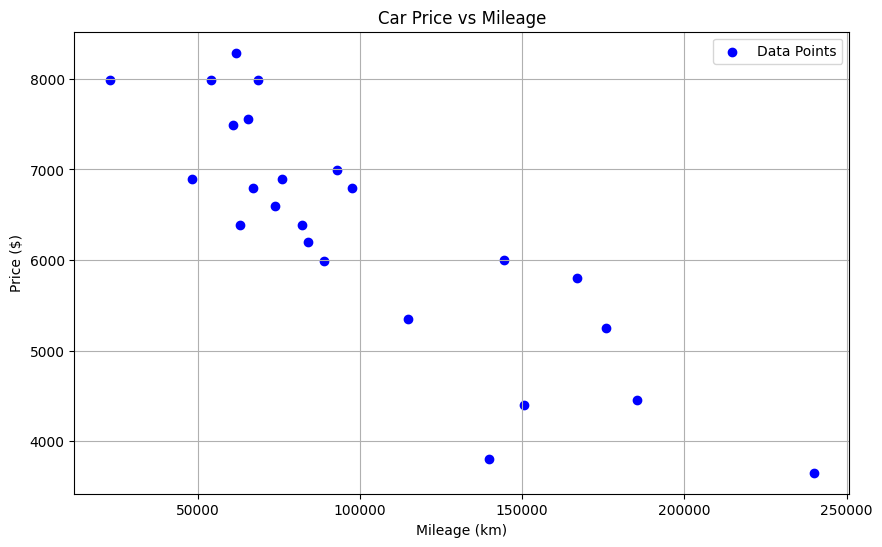

In [3]:
# Plotting the data
plt.figure(figsize=(10, 6))
plt.scatter(data['km'], data['price'], color='blue', label='Data Points')
plt.title('Car Price vs Mileage')
plt.xlabel('Mileage (km)')
plt.ylabel('Price ($)')
plt.legend()
plt.grid()
plt.show()

In [4]:
# Initialize the model
model = PredictCarPriceFromMileage()

2025-08-08 15:25:53,495 - predict_car_price - INFO - Initialized PredictCarPriceFromMileage model
2025-08-08 15:25:53,497 - predict_car_price - INFO - Initial parameters: theta_0=0.0, theta_1=0.0


In [14]:
# Train the model
iterations = 500
learning_rate = 0.01
tolerance = 1e-6

model.drop_model()
model.train(data, 
            iterations=iterations, 
            learning_rate=learning_rate, 
            tolerance=tolerance, 
            verbose=True
           )

2025-08-08 15:27:20,314 - predict_car_price - INFO - Model parameters reset to initial state
2025-08-08 15:27:20,316 - predict_car_price - INFO - Current parameters: theta_0=0.0, theta_1=0.0
2025-08-08 15:27:20,319 - predict_car_price - INFO - Starting training with 24 data points
2025-08-08 15:27:20,320 - predict_car_price - INFO - Training parameters: iterations=500, learning_rate=0.01
2025-08-08 15:27:20,321 - predict_car_price - INFO - Iteration 1/500: Cost = 20880519.291667, theta_0 = 0.000000, theta_1 = 0.000000
2025-08-08 15:27:20,343 - predict_car_price - INFO - Iteration 100/500: Cost = 3053994.417341, theta_0 = 3990.766889, theta_1 = -694.315458
2025-08-08 15:27:20,360 - predict_car_price - INFO - Iteration 200/500: Cost = 603211.109134, theta_0 = 5474.927302, theta_1 = -963.552982
2025-08-08 15:27:20,378 - predict_car_price - INFO - Iteration 300/500: Cost = 273942.749131, theta_0 = 6018.178012, theta_1 = -1066.337947
2025-08-08 15:27:20,395 - predict_car_price - INFO - Iter

Learned parameters: theta_0 = 8440.41791972435, theta_1 = -0.021275032861465384


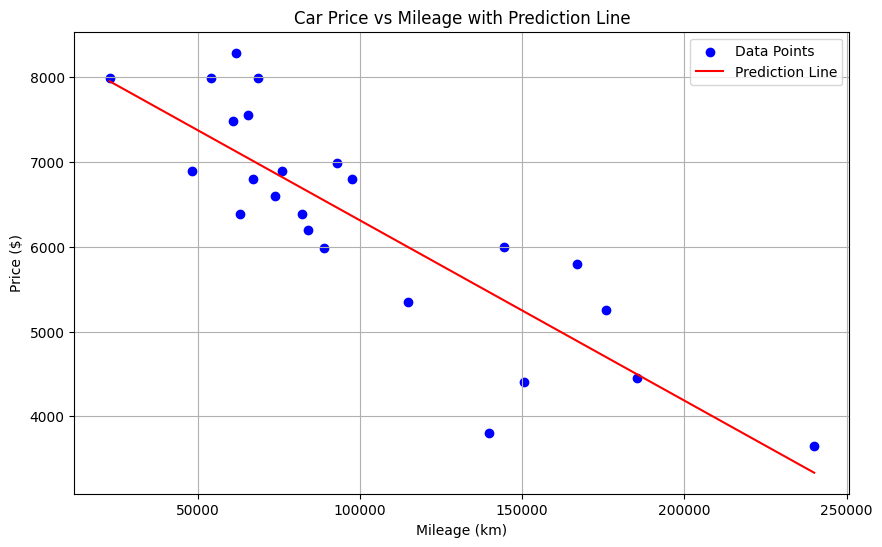

In [15]:
# Display the learned parameters
results = model.get_training_stats()
print(f"Learned parameters: theta_0 = {results['theta_0']}, theta_1 = {results['theta_1']}")

# Plot the new prediction line into previously created plot. Take it from results['theta_0'] and results['theta_1']
plt.figure(figsize=(10, 6))
plt.scatter(data['km'], data['price'], color='blue', label='Data Points')
x_values = np.linspace(data['km'].min(), data['km'].max(), 100)
y_values = results['theta_0'] + results['theta_1'] * x_values
plt.plot(x_values, y_values, color='red', label='Prediction Line')
plt.title('Car Price vs Mileage with Prediction Line')
plt.xlabel('Mileage (km)')
plt.ylabel('Price ($)')
plt.legend()
plt.grid()
plt.show()